In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams

In [3]:
"""
d(rho)  dF
----- + -- = 0
dt      dx

F = rho*u_max*(1 - rho/rho_max)
"""

'\nd(rho)  dF\n----- + -- = 0\ndt      dx\n\nF = rho*u_max*(1 - rho/rho_max)\n'

In [4]:
def rho_red_light(nx, rho_max, rho_in):
    rho = rho_max * np.ones(nx)
    rho[:int((nx - 1) * 3. / 4.)] = rho_in
    return rho

In [5]:
nx = 81
nt = 30
dx = 4 / (nx - 1)
rho_in = 5
rho_max = 10
u_max = 1

x = np.linspace(0, 4, nx)
rho = rho_red_light(nx, rho_max, rho_in)

In [6]:
from matplotlib import animation
from IPython.display import HTML

In [7]:
def computeF(u_max, rho_max, rho):
    return u_max * rho * (1 - rho / rho_max)

In [8]:
def animate(data):
    x = np.linspace(0, 4, nx)
    y = data
    line.set_data(x, y)
    return line

In [9]:
def laxfriedrichs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    for t in range(1, nt):
        f = computeF(u_max, rho_max, rho)
        rho_n[t, 1:-1] = .5 * (rho[2:] + rho[:-2]) - dt / (2. * dx) * (f[2:] - f[:-2])
        #rho_n[t, 1:-1] = (rho[1:-1]) - dt / (2. * dx) * (f[2:] - f[:-2])
        #rho_n[t, 1:-1] = .5 * (rho_n[t - 1, 2:] + rho_n[t - 1, :-2]) - dt / (2. * dx) * (f[2:] - f[:-2])
        rho_n[t, 0] = rho[0]
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
        #rho_n[t, 0] = rho_n[t - , 0]
        #rho_n[t, -1] = rho_n[t - 1, -1]
    return rho_n

In [10]:
sigma = 1.
dt =sigma * dx / u_max
rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)


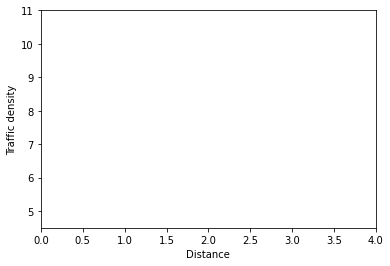

In [11]:
fig = pyplot.figure();
ax = pyplot.axes(xlim = (0, 4),
                 ylim = (4.5, 11),
                 xlabel = ('Distance'),
                 ylabel = ('Traffic density'));
line, = ax.plot([], [], 'o', color = '#003366', lw = 2);

In [12]:
anim = animation.FuncAnimation(fig, animate, frames = rho_n, interval = 50)
HTML(anim.to_jshtml())

In [13]:
def jacobian(u_max, rho_max, rho):
    return u_max * (1 - 2 * rho / rho_max)

In [14]:
def laxwendroff(rho, nt, dt, dx, rho_max, u_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_n[:, :] = rho.copy()
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        J = jacobian(u_max, rho_max, rho)
        rho_n[t, 1:-1] = rho[1:-1] - dt / (2 * dx) * (F[2:] - F[:-2]) \
            + dt ** 2 / (4 * dx ** 2) * ((J[2:] + J[1:-1]) \
            * (F[2:] - F[1:-1]) - (J[1:-1] + J[:-2]) * (F[1:-1] - F[:-2]))
        rho_n[t, 0] = rho[0]
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [15]:
rho = rho_red_light(nx, rho_max, rho_in) 
sigma = 1
dt = sigma*dx/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)

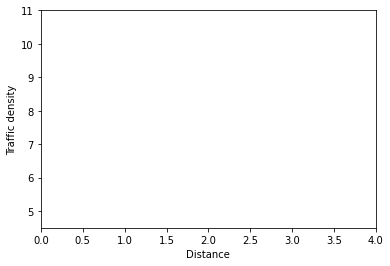

In [16]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11.),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [17]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_jshtml())

In [18]:
def maccormack(rho, nt, dt, dx, u_max, rho_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_star = mp.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1] = rho[:-1] - dt / dx * (F[1:] - F[:-1])
        F_star = computeF(u_max, rho_max, rho_star)
        rho_n[t, 1:] = .5 * (rho[1:])